## Section 1: Dataset Investigations

ADNI project collected and is collecting an enormous amount of data that is provided in many scattered csv files and with quite cryptic labels and codes. This together with the lack of knowledge in the field can be overwhelming and challenging at first. In this section we are going to explore different types of data and determine thier relevance. 


### Uwnpsych Dataset

In [0]:
uwnpsych_file_id='1E3GUw64INaCmS8ld6H2G8HtND_dyZg6S'

uwnpsych_df=read_gdrive_data(uwnpsych_file_id)

display(uwnpsych_df.describe())
display(uwnpsych_df.head())

,RID,ADNI_MEM,ADNI_EF
count,9207.000000,9206.000000,9112.000000
mean,2264.376018,0.220645,0.165758
std,1878.194689,1.045454,1.055390
min,2.000000,-2.899000,-3.228000
25%,621.000000,-0.510000,-0.481000
50%,1283.000000,0.261000,0.234000
75%,4360.000000,0.955750,0.907000
max,6072.000000,3.328000,3.063000


,RID,VISCODE,VISCODE2,USERDATE,EXAMDATE,PHASE,ADNI_MEM,ADNI_EF,update_stamp
0,2,m06,m06,2006-03-07,2006-03-06,ADNI1,0.585,-0.197,2017-10-30 10:19:49.0
1,2,m36,m36,2008-08-27,2008-08-27,ADNI1,0.403,-0.008,2017-10-30 10:19:49.0
2,2,bl,bl,2005-09-09,2005-09-08,ADNI1,0.503,-0.060,2017-10-30 10:19:49.0
3,2,v21,m96,2013-09-11,2013-09-09,ADNI2,0.325,-0.726,2017-10-30 10:19:49.0
4,2,v06,m72,2011-09-20,2011-09-19,ADNI2,0.349,0.304,2017-10-30 10:19:49.0


In [0]:
uwnpsych_df['VISCODE'].value_counts()

bl      1355
m06      898
v11      887
m24      814
m12      744
v05      718
v21      660
m36      467
v31      453
v03      418
v41      381
v06      366
m18      329
m48      232
sc       158
v51       95
m60       76
m72       74
m84       31
m132      23
m120      18
m108       7
m96        3
Name: VISCODE, dtype: int64

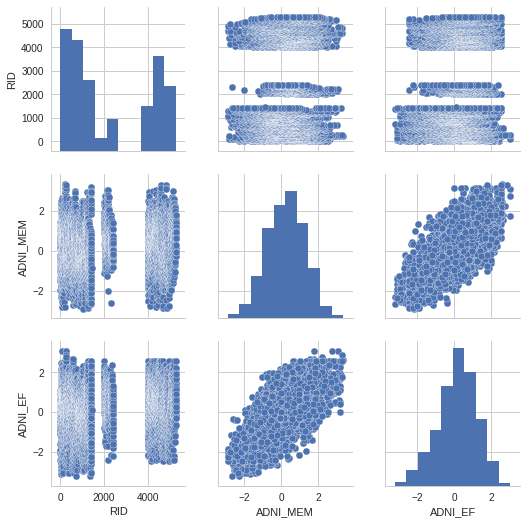

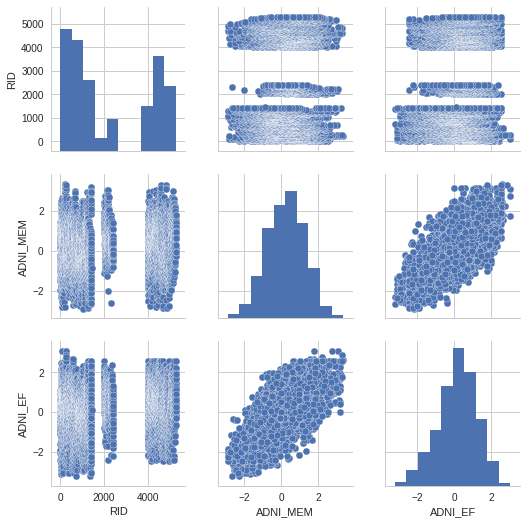

In [0]:
sns.pairplot(data=uwnpsych_df.dropna())

This dataset is a physcological examination dataset.  Seems directly relevant to our predictive modelling.

###Modhach Dataset

In [0]:
modhach_df_file_id='1iDWNCprJ3e_LU4fegAXNyvWo9pJOYhnk'

modhach_df=read_gdrive_data(modhach_df_file_id)
display(modhach_df.describe())
display(modhach_df.head())

,ID,RID,SITEID,HMONSET,HMSTEPWS,HMSOMATC,HMEMOTIO,HMHYPERT,HMSTROKE,HMNEURSM,HMNEURSG,HMSCORE
count,2554.000000,2554.000000,2554.000000,2553.000000,2553.000000,2553.000000,2553.000000,2552.000000,2552.000000,2551.000000,2552.000000,2552.000000
mean,1442.274863,2718.639389,42.998042,0.007051,0.017235,0.031336,0.014101,0.466301,0.030564,0.029008,0.043103,0.638715
std,2434.155022,1992.530324,35.833684,0.118562,0.130170,0.174257,0.117931,0.498961,0.245393,0.239160,0.290486,0.778709
min,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,434.000000,791.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1044.000000,2227.500000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1681.500000,4622.750000,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,21921.000000,6130.000000,127.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,7.000000


,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,HMONSET,HMSTEPWS,HMSOMATC,HMEMOTIO,HMHYPERT,HMSTROKE,HMNEURSM,HMNEURSG,HMSCORE,update_stamp
0,ADNI1,6,2,107,sc,sc,2005-08-17,NaN,2005-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-08-17 00:00:00.0
1,ADNI1,8,3,107,sc,sc,2005-08-18,NaN,2005-08-18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2005-08-18 00:00:00.0
2,ADNI1,10,4,10,sc,sc,2005-08-18,NaN,2005-08-18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2005-08-18 00:00:00.0
3,ADNI1,12,5,107,sc,sc,2005-08-23,NaN,2005-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-08-23 00:00:00.0
4,ADNI1,14,7,10,sc,sc,2005-08-26,NaN,2005-08-25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2005-08-26 00:00:00.0


,ID,RID,SITEID,HMONSET,HMSTEPWS,HMSOMATC,HMEMOTIO,HMHYPERT,HMSTROKE,HMNEURSM,HMNEURSG,HMSCORE
count,2554.000000,2554.000000,2554.000000,2553.000000,2553.000000,2553.000000,2553.000000,2552.000000,2552.000000,2551.000000,2552.000000,2552.000000
mean,1442.274863,2718.639389,42.998042,0.007051,0.017235,0.031336,0.014101,0.466301,0.030564,0.029008,0.043103,0.638715
std,2434.155022,1992.530324,35.833684,0.118562,0.130170,0.174257,0.117931,0.498961,0.245393,0.239160,0.290486,0.778709
min,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,434.000000,791.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1044.000000,2227.500000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1681.500000,4622.750000,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,21921.000000,6130.000000,127.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,7.000000


,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,HMONSET,HMSTEPWS,HMSOMATC,HMEMOTIO,HMHYPERT,HMSTROKE,HMNEURSM,HMNEURSG,HMSCORE,update_stamp
0,ADNI1,6,2,107,sc,sc,2005-08-17,NaN,2005-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-08-17 00:00:00.0
1,ADNI1,8,3,107,sc,sc,2005-08-18,NaN,2005-08-18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2005-08-18 00:00:00.0
2,ADNI1,10,4,10,sc,sc,2005-08-18,NaN,2005-08-18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2005-08-18 00:00:00.0
3,ADNI1,12,5,107,sc,sc,2005-08-23,NaN,2005-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-08-23 00:00:00.0
4,ADNI1,14,7,10,sc,sc,2005-08-26,NaN,2005-08-25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2005-08-26 00:00:00.0


In [0]:
#sns.pairplot(data=modhach_df.dropna())

As we can see, these are all categorical data points that represent the results for the Modified Hachinski tests performed on the patients. It seems the best approach would be to break apart the categories using one-hot encoding. There aren't that many categories, so this shouldn't add a crazy number of features.

Background: Vascular causes and factors remain the most significant preventable component of cognitive disorders of elderly individuals. The Hachinski Ischemic Score (HIS) is the questionnaire most commonly used for diagnosis of vascular dementia.

### Medical History Dataset

In [0]:
medhist_df_file_id = "11pMQ1ye7kPKqZeqy5CistUeTR218lA7P"
medhist_df=read_gdrive_data(medhist_df_file_id)
display(medhist_df.describe())
display(medhist_df.head())

,ID,RID,SITEID,MHSOURCE,MHPSYCH,MH2NEURL,MH3HEAD,MH4CARD,MH5RESP,MH6HEPAT,MH7DERM,MH8MUSCL,MH9ENDO,MH10GAST,MH11HEMA,MH12RENA,MH13ALLE,MH14ALCH,MH14AALCH,MH14BALCH,MH14CALCH,MH15DRUG,MH15ADRUG,MH15BDRUG,MH16SMOK,MH16ASMOK,MH16BSMOK,MH16CSMOK,MH17MALI,MH18SURG,MH19OTHR
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3081.000000,3082.000000,3082.000000,3082.000000,93.000000,93.000000,93.000000,3082.000000,18.000000,18.000000,3082.000000,786.000000,786.000000,725.000000,3082.000000,3082.000000,3082.000000
mean,1206.264763,2260.406879,40.108047,1.006814,0.350746,0.314406,0.628164,0.664179,0.222258,0.038936,0.318624,0.669371,0.423751,0.445165,0.096073,0.433809,0.419533,0.044127,6.344086,16.408602,21.059140,0.009734,13.666667,28.055556,0.398443,1.247455,21.690840,31.614621,0.260221,0.748540,0.213822
std,794.241191,1844.383869,33.750103,0.082277,0.477281,0.464354,0.483373,0.472353,0.415831,0.193473,0.466019,0.470516,0.494232,0.497065,0.294739,0.495680,0.493563,0.205411,4.935441,10.992326,13.423869,0.098195,13.495097,15.734833,0.489657,1.221224,14.188332,14.070471,0.438826,0.433923,0.410069
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,522.500000,669.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000,7.000000,0.000000,3.500000,17.750000,0.000000,0.500000,10.000000,21.000000,0.000000,0.000000,0.000000
50%,1086.000000,1337.500000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,15.000000,24.000000,0.000000,10.000000,31.000000,0.000000,1.000000,20.000000,32.000000,0.000000,1.000000,0.000000
75%,1857.500000,4356.750000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,8.000000,25.000000,31.000000,0.000000,19.500000,40.000000,1.000000,1.500000,30.000000,42.000000,1.000000,1.000000,0.000000
max,2930.000000,5296.000000,127.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,51.000000,46.000000,1.000000,40.000000,50.000000,1.000000,10.000000,66.000000,68.000000,1.000000,1.000000,1.000000


,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,MHSOURCE,MHPSYCH,MH2NEURL,MH3HEAD,MH4CARD,MH5RESP,MH6HEPAT,MH7DERM,MH8MUSCL,MH9ENDO,MH10GAST,MH11HEMA,MH12RENA,MH13ALLE,MH14ALCH,MH14AALCH,MH14BALCH,MH14CALCH,MH15DRUG,MH15ADRUG,MH15BDRUG,MH16SMOK,MH16ASMOK,MH16BSMOK,MH16CSMOK,MH17MALI,MH18SURG,MH19OTHR,MHCOMMEN,update_stamp
0,ADNI1,8,2,107,sc,sc,2005-08-17,NaN,2005-08-17,1,0,0,1,0,0,0,0,0,1,0,0.0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,NaN,2005-08-17 00:00:00.0
1,ADNI1,10,1,10,f,f,2005-08-18,NaN,2005-08-18,1,0,0,1,0,0,1,0,0,0,0,0.0,0,1,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,0,1,NaN,2005-08-18 00:00:00.0
2,ADNI1,12,3,107,sc,sc,2005-08-18,NaN,2005-08-18,1,0,0,1,1,0,0,0,1,1,0,0.0,1,0,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,1,1,0,NaN,2005-08-18 00:00:00.0
3,ADNI1,14,4,10,sc,sc,2005-08-18,NaN,2005-08-18,1,0,0,0,1,0,0,0,1,0,0,0.0,1,0,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,1,0,NaN,2005-08-18 00:00:00.0
4,ADNI1,16,5,107,sc,sc,2005-08-23,NaN,2005-08-23,1,0,0,1,0,0,0,1,0,0,1,0.0,1,0,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,1,0,NaN,2005-08-23 00:00:00.0


,ID,RID,SITEID,MHSOURCE,MHPSYCH,MH2NEURL,MH3HEAD,MH4CARD,MH5RESP,MH6HEPAT,MH7DERM,MH8MUSCL,MH9ENDO,MH10GAST,MH11HEMA,MH12RENA,MH13ALLE,MH14ALCH,MH14AALCH,MH14BALCH,MH14CALCH,MH15DRUG,MH15ADRUG,MH15BDRUG,MH16SMOK,MH16ASMOK,MH16BSMOK,MH16CSMOK,MH17MALI,MH18SURG,MH19OTHR
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3081.000000,3082.000000,3082.000000,3082.000000,93.000000,93.000000,93.000000,3082.000000,18.000000,18.000000,3082.000000,786.000000,786.000000,725.000000,3082.000000,3082.000000,3082.000000
mean,1206.264763,2260.406879,40.108047,1.006814,0.350746,0.314406,0.628164,0.664179,0.222258,0.038936,0.318624,0.669371,0.423751,0.445165,0.096073,0.433809,0.419533,0.044127,6.344086,16.408602,21.059140,0.009734,13.666667,28.055556,0.398443,1.247455,21.690840,31.614621,0.260221,0.748540,0.213822
std,794.241191,1844.383869,33.750103,0.082277,0.477281,0.464354,0.483373,0.472353,0.415831,0.193473,0.466019,0.470516,0.494232,0.497065,0.294739,0.495680,0.493563,0.205411,4.935441,10.992326,13.423869,0.098195,13.495097,15.734833,0.489657,1.221224,14.188332,14.070471,0.438826,0.433923,0.410069
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,522.500000,669.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000,7.000000,0.000000,3.500000,17.750000,0.000000,0.500000,10.000000,21.000000,0.000000,0.000000,0.000000
50%,1086.000000,1337.500000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,15.000000,24.000000,0.000000,10.000000,31.000000,0.000000,1.000000,20.000000,32.000000,0.000000,1.000000,0.000000
75%,1857.500000,4356.750000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,8.000000,25.000000,31.000000,0.000000,19.500000,40.000000,1.000000,1.500000,30.000000,42.000000,1.000000,1.000000,0.000000
max,2930.000000,5296.000000,127.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,51.000000,46.000000,1.000000,40.000000,50.000000,1.000000,10.000000,66.000000,68.000000,1.000000,1.000000,1.000000


,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,MHSOURCE,MHPSYCH,MH2NEURL,MH3HEAD,MH4CARD,MH5RESP,MH6HEPAT,MH7DERM,MH8MUSCL,MH9ENDO,MH10GAST,MH11HEMA,MH12RENA,MH13ALLE,MH14ALCH,MH14AALCH,MH14BALCH,MH14CALCH,MH15DRUG,MH15ADRUG,MH15BDRUG,MH16SMOK,MH16ASMOK,MH16BSMOK,MH16CSMOK,MH17MALI,MH18SURG,MH19OTHR,MHCOMMEN,update_stamp
0,ADNI1,8,2,107,sc,sc,2005-08-17,NaN,2005-08-17,1,0,0,1,0,0,0,0,0,1,0,0.0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,NaN,2005-08-17 00:00:00.0
1,ADNI1,10,1,10,f,f,2005-08-18,NaN,2005-08-18,1,0,0,1,0,0,1,0,0,0,0,0.0,0,1,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,0,1,NaN,2005-08-18 00:00:00.0
2,ADNI1,12,3,107,sc,sc,2005-08-18,NaN,2005-08-18,1,0,0,1,1,0,0,0,1,1,0,0.0,1,0,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,1,1,0,NaN,2005-08-18 00:00:00.0
3,ADNI1,14,4,10,sc,sc,2005-08-18,NaN,2005-08-18,1,0,0,0,1,0,0,0,1,0,0,0.0,1,0,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,1,0,NaN,2005-08-18 00:00:00.0
4,ADNI1,16,5,107,sc,sc,2005-08-23,NaN,2005-08-23,1,0,0,1,0,0,0,1,0,0,1,0.0,1,0,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,1,0,NaN,2005-08-23 00:00:00.0


In [0]:
#sns.pairplot(data=medhist_df.dropna())

In [0]:
medhist_stripped_df = medhist_df[['RID','EXAMDATE','MHSOURCE','MHPSYCH','MH2NEURL','MH3HEAD','MH4CARD','MH5RESP','MH6HEPAT','MH7DERM','MH8MUSCL','MH9ENDO','MH10GAST','MH12RENA','MH13ALLE','MH14ALCH','MH15DRUG','MH16SMOK','MH17MALI','MH18SURG','MH19OTHR']]  
medhist_stripped_df.head()

,RID,EXAMDATE,MHSOURCE,MHPSYCH,MH2NEURL,MH3HEAD,MH4CARD,MH5RESP,MH6HEPAT,MH7DERM,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,MH13ALLE,MH14ALCH,MH15DRUG,MH16SMOK,MH17MALI,MH18SURG,MH19OTHR
0,2,2005-08-17,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,2005-08-18,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,3,2005-08-18,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1,0
3,4,2005-08-18,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,5,2005-08-23,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0


,RID,EXAMDATE,MHSOURCE,MHPSYCH,MH2NEURL,MH3HEAD,MH4CARD,MH5RESP,MH6HEPAT,MH7DERM,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,MH13ALLE,MH14ALCH,MH15DRUG,MH16SMOK,MH17MALI,MH18SURG,MH19OTHR
0,2,2005-08-17,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,2005-08-18,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,3,2005-08-18,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1,0
3,4,2005-08-18,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,5,2005-08-23,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0


In [0]:
medhist_stripped_df.to_csv('medhist_stripped.csv')

This data set is already someone One-Hot-Encoded for us and has useful data with some columns that are missing most of their entries.  To make this compatible with our overall data merge, I have pulled the columns that will be relevant, the RID to join on, and the Exam date to compare to our DX date.

### Physical Dataset

In [0]:
physical_df_file_id = "1mRhCaMhWbn6PFWVBGcmMVwbNG_SOHimY"
physical_df=read_gdrive_data(physical_df_file_id)
display(physical_df.describe())
display(physical_df.head())

,ID,RID,SITEID,PXGENAPP,PXHEADEY,PXNECK,PXCHEST,PXHEART,PXABDOM,PXEXTREM,PXPERIPH,PXSKIN,PXMUSCUL,PXBACK,PXOTHER,PXABNORM
count,2781.000000,2781.000000,2781.000000,2764.000000,2764.000000,2764.000000,2763.000000,2763.000000,2761.000000,2764.000000,2764.000000,2763.000000,2763.000000,1630.000000,2644.000000,2781.000000
mean,1376.294858,2583.713772,41.638619,1.022431,1.199711,1.017366,1.027868,1.086500,1.063383,1.092619,1.053184,1.172638,1.149475,1.065644,0.996974,1.009709
std,2265.902743,1990.957379,34.917105,0.155266,0.402561,0.138717,0.171096,0.284989,0.248115,0.293672,0.229227,0.380865,0.359654,0.247735,0.236617,0.098071
min,6.000000,2.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000
25%,474.000000,734.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,954.000000,2075.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1646.000000,4579.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21719.000000,6122.000000,127.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,PXGENAPP,PXGENDES,PXHEADEY,PXHEADDE,PXNECK,PXNECDES,PXCHEST,PXCHEDES,PXHEART,PXHEADES,PXABDOM,PXABDDES,PXEXTREM,PXEDEMA,PXEDEDES,PXPERIPH,PXPERDES,PXSKIN,PXSKIDES,PXMUSCUL,PXMUSDES,PXBACK,PXBACKDES,PXOTHER,PXOTRCOM,PXGENCOM,PXABNORM,update_stamp
0,ADNI1,6,2,107,sc,sc,2005-08-17,NaN,2005-08-17,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,"R hand birth defect, fingers not functional",NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,stacy schneider GNP,1,2005-08-17 00:00:00.0
1,ADNI1,8,3,107,sc,sc,2005-08-18,NaN,2005-08-18,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,stacy schneider GNP,1,2005-08-18 00:00:00.0
2,ADNI1,10,4,10,sc,sc,2005-08-18,NaN,2005-08-18,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1,2005-08-18 00:00:00.0
3,ADNI1,12,5,107,sc,sc,2005-08-23,NaN,2005-08-23,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,II/IV systolic murmur,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1,2005-08-23 00:00:00.0
4,ADNI1,14,7,10,sc,sc,2005-08-25,NaN,2005-08-25,1.0,NaN,2.0,lest eyes ptosis pal decrease b/l hearing,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,+1 edema B/L,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1,2005-08-25 00:00:00.0


,ID,RID,SITEID,PXGENAPP,PXHEADEY,PXNECK,PXCHEST,PXHEART,PXABDOM,PXEXTREM,PXPERIPH,PXSKIN,PXMUSCUL,PXBACK,PXOTHER,PXABNORM
count,2781.000000,2781.000000,2781.000000,2764.000000,2764.000000,2764.000000,2763.000000,2763.000000,2761.000000,2764.000000,2764.000000,2763.000000,2763.000000,1630.000000,2644.000000,2781.000000
mean,1376.294858,2583.713772,41.638619,1.022431,1.199711,1.017366,1.027868,1.086500,1.063383,1.092619,1.053184,1.172638,1.149475,1.065644,0.996974,1.009709
std,2265.902743,1990.957379,34.917105,0.155266,0.402561,0.138717,0.171096,0.284989,0.248115,0.293672,0.229227,0.380865,0.359654,0.247735,0.236617,0.098071
min,6.000000,2.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000
25%,474.000000,734.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,954.000000,2075.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1646.000000,4579.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21719.000000,6122.000000,127.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,PXGENAPP,PXGENDES,PXHEADEY,PXHEADDE,PXNECK,PXNECDES,PXCHEST,PXCHEDES,PXHEART,PXHEADES,PXABDOM,PXABDDES,PXEXTREM,PXEDEMA,PXEDEDES,PXPERIPH,PXPERDES,PXSKIN,PXSKIDES,PXMUSCUL,PXMUSDES,PXBACK,PXBACKDES,PXOTHER,PXOTRCOM,PXGENCOM,PXABNORM,update_stamp
0,ADNI1,6,2,107,sc,sc,2005-08-17,NaN,2005-08-17,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,"R hand birth defect, fingers not functional",NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,stacy schneider GNP,1,2005-08-17 00:00:00.0
1,ADNI1,8,3,107,sc,sc,2005-08-18,NaN,2005-08-18,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,stacy schneider GNP,1,2005-08-18 00:00:00.0
2,ADNI1,10,4,10,sc,sc,2005-08-18,NaN,2005-08-18,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1,2005-08-18 00:00:00.0
3,ADNI1,12,5,107,sc,sc,2005-08-23,NaN,2005-08-23,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,II/IV systolic murmur,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1,2005-08-23 00:00:00.0
4,ADNI1,14,7,10,sc,sc,2005-08-25,NaN,2005-08-25,1.0,NaN,2.0,lest eyes ptosis pal decrease b/l hearing,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,+1 edema B/L,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1,2005-08-25 00:00:00.0


Given the unstandardized nature and the low anticipated predicted power of this dataset, we have chosen not to include it in our first run of EDA.

### Summary
Having reviewed the individual pulled datasets, we are now going to go back to the foundational dataset and create our own merge of the predictors based on research into their relevance.